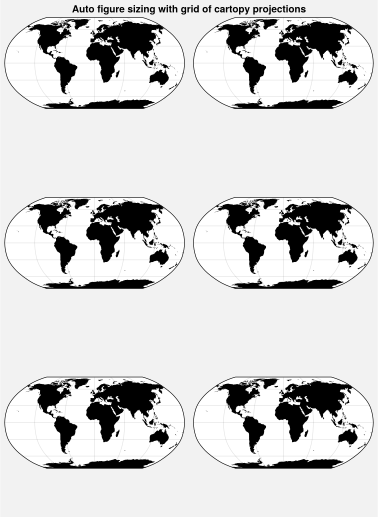

In [1]:
import proplot as plot
import numpy as np

# Auto sized grid of cartopy projections
fig, axs = plot.subplots(ncols=2, nrows=3, proj='robin')
axs.format(
    land=True, landcolor='k',
    suptitle='Auto figure sizing with grid of cartopy projections'
)

# Auto sized grid of images
state = np.random.RandomState(51423)
fig, axs = plot.subplots(ncols=3, nrows=2, axwidth=1.7)
colors = state.rand(15, 12, 3).cumsum(axis=2)
colors /= colors.max()
axs.imshow(colors)
axs.format(
    suptitle='Auto figure sizing with grid of images'
)

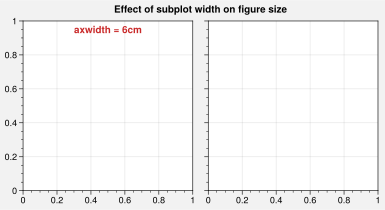

In [2]:
import proplot as plot

# Change the reference subplot width
suptitle = 'Effect of subplot width on figure size'
for axwidth in ('4cm', '6cm'):
    fig, axs = plot.subplots(ncols=2, axwidth=axwidth,)
    axs[0].format(
        suptitle=suptitle,
        title=f'axwidth = {axwidth}', titleweight='bold',
        titleloc='uc', titlecolor='red9',
    )

# Change the reference subplot aspect ratio
for aspect in (1, (3, 2)):
    fig, axs = plot.subplots(ncols=2, nrows=2, axwidth=1.6, aspect=aspect)
    axs[0].format(
        suptitle='Effect of subplot aspect ratio on figure size',
        title=f'aspect = {aspect}', titleweight='bold',
        titleloc='uc', titlecolor='red9',
    )

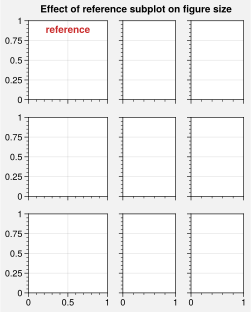

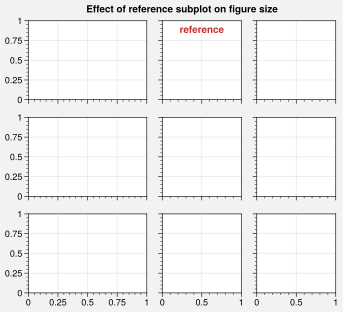

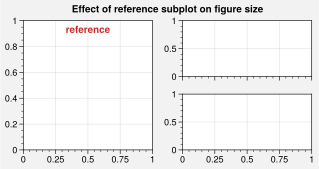

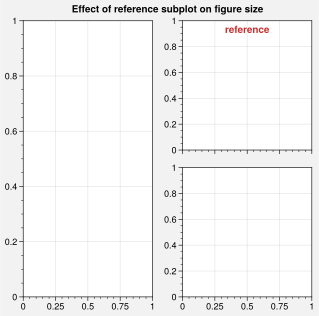

In [3]:
import proplot as plot

# Change the reference subplot in presence of unequal width/height ratios
for ref in (1, 2):
    fig, axs = plot.subplots(
        ref=ref, nrows=3, ncols=3, wratios=(3, 2, 2),
        axwidth=1.1,
    )
    axs[ref - 1].format(
        suptitle='Effect of reference subplot on figure size',
        title='reference', titleweight='bold',
        titleloc='uc', titlecolor='red9'
    )

# Change the reference subplot in a complex grid
for ref in (1, 2):
    fig, axs = plot.subplots(
        [[1, 2], [1, 3]],
        ref=ref, axwidth=1.8, span=False
    )
    axs[ref - 1].format(
        suptitle='Effect of reference subplot on figure size',
        title='reference', titleweight='bold',
        titleloc='uc', titlecolor='red9'
    )

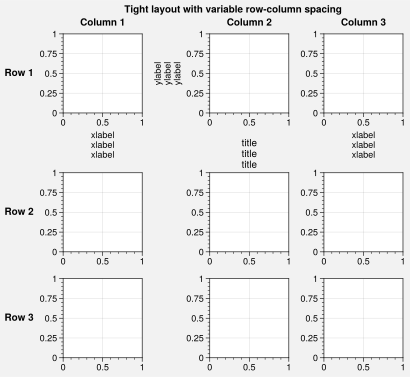

In [4]:
import proplot as plot

# Automatic spacing for all margins and between all columns and rows
fig, axs = plot.subplots(nrows=3, ncols=3, axwidth=1.1, share=0)

# Formatting that stress-tests the algorithm
axs[4].format(
    title='title\ntitle\ntitle',
    suptitle='Tight layout with variable row-column spacing'
)
axs[1].format(ylabel='ylabel\nylabel\nylabel')
axs[:4:2].format(xlabel='xlabel\nxlabel\nxlabel')
axs.format(
    rowlabels=['Row 1', 'Row 2', 'Row 3'],
    collabels=['Column 1', 'Column 2', 'Column 3']
)

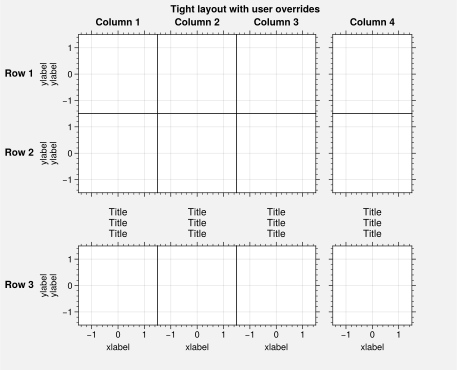

In [5]:
import proplot as plot

# Manual spacing for certain margins and between certain columns and rows
fig, axs = plot.subplots(
    ncols=4, nrows=3, axwidth=1.1, span=False,
    bottom='5em', right='5em',  # margin spacing overrides
    wspace=(0, 0, None), hspace=(0, None),  # column and row spacing overrides
)

# Formatting that stress-tests the algorithm
axs.format(
    xlim=(-1.5, 1.5), ylim=(-1.5, 1.5), xlocator=1, ylocator=1,
    suptitle='Tight layout with user overrides',
    rowlabels=['Row 1', 'Row 2', 'Row 3'],
    collabels=['Column 1', 'Column 2', 'Column 3', 'Column 4']
)
axs[0, :].format(xtickloc='top')
axs[2, :].format(xtickloc='both')
axs[:, 1].format(ytickloc='neither')
axs[:, 2].format(ytickloc='right')
axs[:, 3].format(ytickloc='both')
axs[-1, :].format(title='Title\nTitle\nTitle', xlabel='xlabel')
axs[:, 0].format(ylabel='ylabel\nylabel')

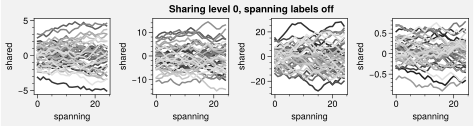

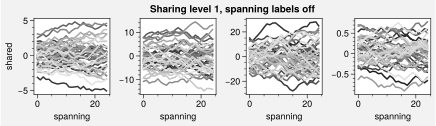

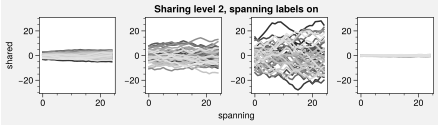

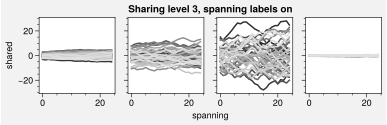

In [6]:
import proplot as plot
import numpy as np
N = 50
M = 40
state = np.random.RandomState(51423)
colors = plot.Colors('grays_r', M, left=0.1, right=0.8)
datas = []
for scale in (1, 3, 7, 0.2):
    data = scale * (state.rand(N, M) - 0.5).cumsum(axis=0)[N // 2:, :]
    datas.append(data)

# Same plot with different sharing and spanning settings
for share in (0, 1, 2, 3):
    fig, axs = plot.subplots(
        ncols=4, aspect=1, axwidth=1.06,
        sharey=share, spanx=share // 2
    )
    for ax, data in zip(axs, datas):
        on = ['off', 'on'][share // 2]
        ax.plot(data, cycle=colors)
        ax.format(
            suptitle=f'Sharing level {share}, spanning labels {on}',
            grid=False, xlabel='spanning', ylabel='shared'
        )

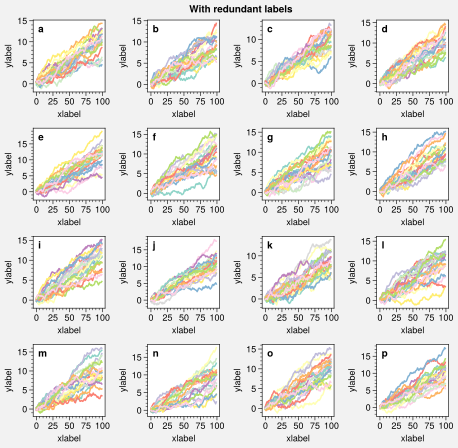

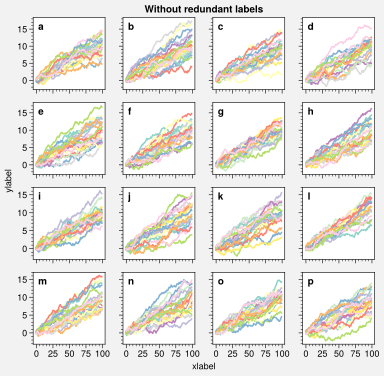

In [7]:
import proplot as plot
import numpy as np
plot.rc.reset()
plot.rc.cycle = 'Set3'
state = np.random.RandomState(51423)
titles = ['With redundant labels', 'Without redundant labels']

# Same plot with and without default sharing settings
for mode in (0, 1):
    fig, axs = plot.subplots(
        nrows=4, ncols=4, share=3 * mode,
        span=1 * mode, axwidth=1
    )
    for ax in axs:
        ax.plot((state.rand(100, 20) - 0.4).cumsum(axis=0))
    axs.format(
        xlabel='xlabel', ylabel='ylabel', suptitle=titles[mode],
        abc=True, abcloc='ul',
        grid=False, xticks=25, yticks=5
    )

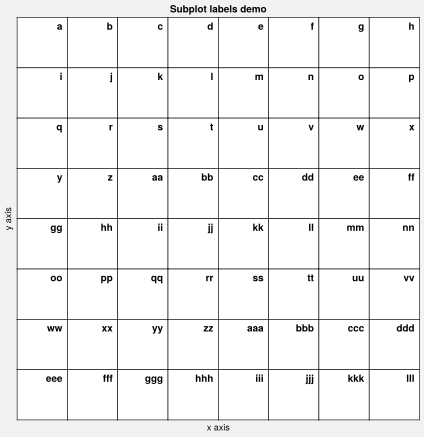

In [8]:
import proplot as plot
fig, axs = plot.subplots(nrows=8, ncols=8, axwidth=0.7, space=0)
axs.format(
    abc=True, abcloc='ur', xlabel='x axis', ylabel='y axis',
    xticks=[], yticks=[], suptitle='Subplot labels demo'
)

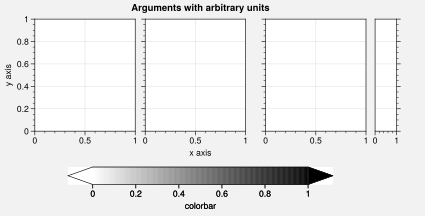

In [9]:
import proplot as plot
import numpy as np
with plot.rc.context(fontsize='12px'):
    fig, axs = plot.subplots(
        ncols=3, width='15cm', height='3in',
        wspace=('10pt', '20pt'), right='10mm'
    )
    cmap = plot.Colormap('Mono')
    cb = fig.colorbar(
        cmap, loc='b', extend='both', label='colorbar',
        width='2em', extendsize='3em', shrink=0.8,
    )
    pax = axs[2].panel('r', width='5en')
    pax.format(xlim=(0, 1))
axs.format(
    suptitle='Arguments with arbitrary units',
    xlabel='x axis', ylabel='y axis',
    xlim=(0, 1), ylim=(0, 1),
)